# Procesado Espectros Raman NANOBASE

In [1]:
import numpy as np
import pandas as pd
#%matplotlib inline
import re
import os
import math
import numpy as np
import pandas as pd
import joblib
import warnings
import time
import matplotlib.pyplot as plt

# Directorio en el que se encuentran guardados los datos de Raman
path_nanobase_mac = '/Users/drea/Library/CloudStorage/OneDrive-UNICAN/RamanNanoBase/CONCHAS/CSV'
path_nanobase_windows ='D:\OneDrive - UNICAN\RamanNanoBase\CONCHAS\CSV'
path_nanobase = path_nanobase_windows
# Obtén la lista de archivos en la carpeta
files = os.listdir(path_nanobase)
# Filtrar solo los archivos CSV
csv_files = [f for f in files if f.endswith('.CSV')]

def nombre_muestra(csv_file):
    file = csv_file.split("_")[1]
    nombre = re.sub(r'(\D)(\d)', r'\1 \2', file)
    muestra = nombre.capitalize()
    return muestra

print("Número de archivos CSV: ", len(csv_files))

Número de archivos CSV:  1


In [3]:
# Cargar los datos de Raman
dataframes = []
for csv_file in csv_files:
    df = pd.read_csv(os.path.join(path_nanobase, csv_file), engine='python', sep=',', skiprows=14, decimal='.')
    # Eliminar columna no deseada
    if 'Unnamed: 1937' in df.columns:
            df = df.drop(columns=['Unnamed: 1937'])
    nombre = nombre_muestra(csv_file)
    df['Muestra'] = f'{nombre}'
    dataframes.append(df)
    data = pd.concat(dataframes)
data.set_index(['Muestra', 'X', 'Y'], inplace=True)

# Eliminar columnas no deseadas
data.drop(columns=['Z', 'XINDEX', 'YINDEX', 'ZINDEX'], inplace=True)

In [5]:
data

-77.345  -75.107  -72.871  -70.634  -68.396  \
Muestra X          Y                                                        
Lit 3   -78.011658 -99.27785      312      341      326      276      312   
        -77.501658 -99.27785      300      303      310      320      294   
        -76.991658 -99.27785      286      307      318      320      318   
        -76.481658 -99.27785      302      349      352      316      300   
        -75.971658 -99.27785      318      313      276      302      284   
...                               ...      ...      ...      ...      ...   
         75.498342  99.11215      328      283      300      314      332   
         76.008342  99.11215      302      325      312      294      330   
         76.518342  99.11215      250      307      300      352      294   
         77.028342  99.11215      304      333      314      294      314   
         77.538342  99.11215      332      321      290      296      296   

                              -66.159  -63.924  -61.687  -59.455  -57.216  \
Muestra X          Y                                                        
Lit 3   -78.011658 -99.27785      360      299      320      342      309   
        -77.501658 -99.27785      314      335      384      290      303   
        -76.991658 -99.27785      334      309      296      306      319   
        -76.481658 -99.27785      284      309      288      334      313   
        -75.971658 -99.27785      314      323      314      270      321   
...                               ...      ...      ...      ...      ...   
         75.498342  99.11215      326      315      302      298      297   
         76.008342  99.11215      350      315      310      294      353   
         76.518342  99.11215      256      289      302      322      303   
         77.028342  99.11215      390      329      328      334      313   
         77.538342  99.11215      316      289      308      310      341   

                              ...  3303.863  3305.027  3306.193  3307.363  \
Muestra X          Y          ...                                           
Lit 3   -78.011658 -99.27785  ...      1096      1032      1011      1126   
        -77.501658 -99.27785  ...      1059      1194       971      1099   
        -76.991658 -99.27785  ...       915      1089      1123      1124   
        -76.481658 -99.27785  ...      1098      1069      1051      1014   
        -75.971658 -99.27785  ...      1086      1089      1127      1040   
...                           ...       ...       ...       ...       ...   
         75.498342  99.11215  ...      1494      1678      1575      1596   
         76.008342  99.11215  ...      1608      1710      1644      1868   
         76.518342  99.11215  ...      1842      1785      1791      1773   
         77.028342  99.11215  ...      1950      1769      1669      1872   
         77.538342  99.11215  ...      1867      1895      1932      1986   

                              3308.530  3309.694  3310.858  3312.022  \
Muestra X          Y                                                   
Lit 3   -78.011658 -99.27785      1018      1088       939      1026   
        -77.501658 -99.27785      1114       953      1081      1040   
        -76.991658 -99.27785      1143      1074      1160      1108   
        -76.481658 -99.27785      1162       992      1110      1048   
        -75.971658 -99.27785      1081      1122       996      1135   
...                                ...       ...       ...       ...   
         75.498342  99.11215      1635      1713      1674      1526   
         76.008342  99.11215      1572      1766      1799      1539   
         76.518342  99.11215      1698      1753      1730      1742   
         77.028342  99.11215      1868      1942      1697      1829   
         77.538342  99.11215      1923      2028      1965      2072   

                              3313.186  3314.347  
Muestra X          Y                

In [9]:
# Guardamos los datos en un CSV
data.to_csv(f'C:/Users/perezandrea.UNICAN/Documents/CONCHAS/{nombre}.csv',index=True)

In [12]:
data = data.drop(data.columns[data.columns.astype(float) < 50], axis=1)


51.935  54.157  56.376  58.596  60.812  63.030  \
Muestra X          Y                                                           
Lit 3   -78.011658 -99.27785     591     556     533     561     568     672   
        -77.501658 -99.27785     657     634     473     551     662     566   
        -76.991658 -99.27785     561     670     639     531     536     640   
        -76.481658 -99.27785     611     620     579     583     530     686   
        -75.971658 -99.27785     599     650     617     595     592     578   
...                              ...     ...     ...     ...     ...     ...   
         75.498342  99.11215     851     690     813     735     814     762   
         76.008342  99.11215     893     780     789     807     748     770   
         76.518342  99.11215     823     832     803     763     808     762   
         77.028342  99.11215     783     798     885     879     816     762   
         77.538342  99.11215     913     782     815     857     804     822   

                              65.251  67.470  69.684  71.902  ...  3303.863  \
Muestra X          Y                                          ...             
Lit 3   -78.011658 -99.27785     669     588     660     577  ...      1096   
        -77.501658 -99.27785     533     606     624     605  ...      1059   
        -76.991658 -99.27785     661     624     512     583  ...       915   
        -76.481658 -99.27785     563     630     546     575  ...      1098   
        -75.971658 -99.27785     699     550     606     653  ...      1086   
...                              ...     ...     ...     ...  ...       ...   
         75.498342  99.11215     821     810     678     767  ...      1494   
         76.008342  99.11215     945     806     900     875  ...      1608   
         76.518342  99.11215     823     856     792     825  ...      1842   
         77.028342  99.11215     839     754     842     837  ...      1950   
         77.538342  99.11215     937     832     758     863  ...      1867   

                              3305.027  3306.193  3307.363  3308.530  \
Muestra X          Y                                                   
Lit 3   -78.011658 -99.27785      1032      1011      1126      1018   
        -77.501658 -99.27785      1194       971      1099      1114   
        -76.991658 -99.27785      1089      1123      1124      1143   
        -76.481658 -99.27785      1069      1051      1014      1162   
        -75.971658 -99.27785      1089      1127      1040      1081   
...                                ...       ...       ...       ...   
         75.498342  99.11215      1678      1575      1596      1635   
         76.008342  99.11215      1710      1644      1868      1572   
         76.518342  99.11215      1785      1791      1773      1698   
         77.028342  99.11215      1769      1669      1872      1868   
         77.538342  99.11215      1895      1932      1986      1923   

                              3309.694  3310.858  3312.022  3313.186  3314.347  
Muestra X          Y                                                            
Lit 3   -78.011658 -99.27785      1088       939      1026      1155       959  
        -77.501658 -99.27785       953      1081      1040      1000      1106  
        -76.991658 -99.27785      1074      1160      1108      1047       988  
        -76.481658 -99.27785       992      1110      1048      1088       928  
        -75.971658 -99.27785      1122       996      1135      1096       992  
...                                ...       ...       ...       ...       ...  
         75.498342  99.11215      1713      1674      1526      1606      1648  
         76.008342  99.11215      1766      1799      1539      1593      1718  
         76.518342  99.11215      1753      1730      1742      1826      1637  
         77.028342  99.11215      1942      1697      1829      2022      1783  
         77.538342  99.11215      2028      1965    

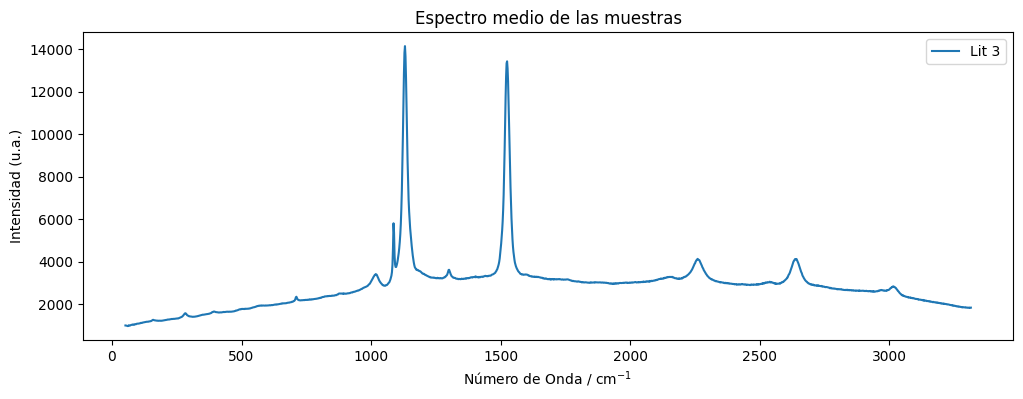

In [13]:
#################### Pintar espectros medios #############################
def avg_spectrum (data,
                  muestras, 
                  titulo = "Espectro medio de las muestras"):
  #data = pd.concat(dataframes, axis=0)
  #data = create_df(csv_files, path)

  plt.figure(figsize=(12, 4))

  for i, muestra in enumerate(muestras):
    data_muestra = data[data.index.get_level_values('Muestra') == f'{muestra}']
    wavenumber = data_muestra.columns.get_level_values(0).astype(float)
    # Calculamos las intensidades medias para cada numero de onda
    mean_intensity = data_muestra.mean(axis=0)
    #color = colores[i % len(colores)]

    # Representa el espectro medio con el color correspondiente
    plt.plot(wavenumber, mean_intensity, label=f'{muestra}')#, color=color)

  # Etiquetas y título para el gráfico
  plt.xlabel("Número de Onda / cm$^{-1}$ ")
  plt.ylabel('Intensidad (u.a.)')
  plt.title(f'{titulo}')

  plt.legend()
  plt.grid(False)
  plt.show()


avg_spectrum(data, muestras =['Lit 3'])